# PENDIENTE
####Normality test of my data
####Mapas con seaborn sobre data environment temperatura del agua inshore o offshore, etc.
####Traducir todo a inglés
####Concluir algo


In [176]:
### Import packages for data analysis and visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [177]:
### Import data from CSV files
# Define a FUNCTION that will allow me to import a CSV file and load it into a pandas DataFrame
def import_csv(file):
    # Read the csv file into a DataFrame: df con el paquete pandas
    import pandas as pd 
    return pd.read_csv(file)

#Use the name of the PREdefined FUNCTION and the name of the .csv file
import_csv("C:/Projects/modelab_jp/Final_project_jp/raw_data/water.csv")
import_csv("C:/Projects/modelab_jp/Final_project_jp/raw_data/sediment.csv")
import_csv("C:/Projects/modelab_jp/Final_project_jp/raw_data/environment.csv")

#Define a VARIABLE to be able to manipulate the DataFrame (not just display it)
water = import_csv("C:/Projects/modelab_jp/Final_project_jp/raw_data/water.csv")
sediment = import_csv("C:/Projects/modelab_jp/Final_project_jp/raw_data/sediment.csv")
environment = import_csv("C:/Projects/modelab_jp/Final_project_jp/raw_data/environment.csv")

In [178]:
#Save these tables as data_FinalProject.xlsx files
with pd.ExcelWriter("C:\Projects\modelab_jp\data_FinalProject.xlsx") as writer:
    water.to_excel(writer, sheet_name="water")
    sediment.to_excel(writer, sheet_name="sediment")
    environment.to_excel(writer, sheet_name="environment")

In [179]:
water

,Sitio,Distancia_m,Muestra,P_total_mg_L,N_total_mg_L,C_total_mg_L,DQO_mg_L,Solidos_totales_mg_L,pH
0,1,0,Agua,0.097,2.32,3.47,15.2,30.7,7.94
1,2,10,Agua,0.033,0.98,4.53,5.2,28.9,8.26
2,3,20,Agua,0.055,0.79,4.53,12.7,35.4,8.26
3,4,30,Agua,0.037,1.48,4.14,8.4,35.0,8.15
4,5,40,Agua,0.036,2.47,2.36,14.7,30.1,8.04
5,6,50,Agua,0.013,0.98,5.34,7.6,33.3,8.04
6,7,60,Agua,0.065,1.84,3.28,15.4,34.5,8.19
7,8,70,Agua,0.055,2.02,2.75,10.8,32.4,8.26
8,9,80,Agua,0.015,0.98,2.16,19.1,32.2,8.25
9,10,90,Agua,0.035,1.96,4.36,7.1,29.9,8.21


In [180]:
sediment


,Sitio,Tipo_sedimento,Distancia_m,Humedad_%,pH,CE_uS,Redfield_ratio,C_total_mg_g,N_total_mg_g,P_total_mg_g
0,1,superficial,0,35.0,7.99,683.1,15.1,4.09,0.58,0.041
1,1,50cm,0,58.0,7.61,1242.8,14.2,3.37,0.38,0.026
2,2,superficial,10,49.3,7.73,551.6,18.6,2.49,0.31,0.027
3,2,50cm,10,43.9,7.79,1864.0,14.9,1.69,0.20,0.019
4,3,superficial,20,26.2,7.86,888.2,14.2,2.43,0.25,0.022
5,3,50cm,20,26.2,8.13,1493.8,16.3,2.48,0.32,0.026
6,4,superficial,30,22.3,7.66,967.6,13.1,3.69,0.45,0.032
7,4,50cm,30,54.6,7.91,1280.1,18.4,3.41,0.37,0.026
8,5,superficial,40,44.0,7.97,1320.1,12.6,4.16,0.54,0.054
9,5,50cm,40,48.3,7.54,777.3,19.9,2.92,0.40,0.032


In [181]:
environment

,Sitio,Profundidad_m,Temp_potencial_C,Salinidad_PSU,Velocidad_corriente_ms,Direccion_corriente_deg,Clorofila_a_mg_m3,Nitrato_mmol_m3,Oxigeno_mmol_m3,Fosfato_mmol_m3,Silicato_mmol_m3,Temp_atmosferica_C,Humedad_relativa_%,Viento_ms,Precipitacion_mm,Presion_hPa,Radiacion_Wm2
0,1,1.0,28.28,36.10,0.21,286.1,0.76,0.37,193.1,0.171,1.84,26.2,71.3,3.6,5.5,1008.6,223.7
1,2,3.1,27.17,36.38,0.19,180.9,0.77,0.45,219.3,0.172,1.01,26.2,83.3,1.5,7.1,1012.6,221.0
2,3,5.2,27.32,36.30,0.07,207.7,0.75,0.87,159.8,0.180,1.06,30.9,83.5,1.2,6.6,1005.1,176.0
3,4,7.3,28.80,35.45,0.14,177.3,0.42,0.39,186.3,0.187,0.64,28.2,85.9,6.8,2.8,1006.2,215.1
4,5,9.4,28.21,36.42,0.12,70.3,0.21,0.25,211.4,0.127,1.37,26.8,88.2,6.0,9.5,1005.5,209.8
5,6,11.6,27.02,35.47,0.11,260.1,0.76,0.60,201.9,0.125,0.55,29.1,94.4,5.2,7.4,1005.4,242.4
6,7,13.7,27.20,35.65,0.29,101.1,0.46,0.94,198.8,0.170,1.20,30.6,82.9,3.5,5.5,1013.6,245.3
7,8,15.8,28.33,36.49,0.15,8.8,0.78,0.73,199.2,0.147,1.31,27.3,78.1,2.0,6.1,1012.0,156.8
8,9,17.9,27.01,36.30,0.27,232.4,0.78,0.61,175.2,0.155,0.93,29.7,89.9,1.9,4.2,1009.7,206.2
9,10,20.0,27.32,36.70,0.21,63.8,0.71,0.19,170.6,0.169,1.39,26.5,76.8,2.5,2.5,1006.0,243.9


#### Exploring DataFrame

In [182]:
water.columns #Muestra los nombres de las columnas

Index(['Sitio', 'Distancia_m', 'Muestra', 'P_total_mg_L', 'N_total_mg_L',
       'C_total_mg_L', 'DQO_mg_L', 'Solidos_totales_mg_L', 'pH'],
      dtype='object')

In [183]:
sediment.columns

Index(['Sitio', 'Tipo_sedimento', 'Distancia_m', 'Humedad_%', 'pH', 'CE_uS',
       'Redfield_ratio', 'C_total_mg_g', 'N_total_mg_g', 'P_total_mg_g'],
      dtype='object')

In [184]:
environment.columns

Index(['Sitio', 'Profundidad_m', 'Temp_potencial_C', 'Salinidad_PSU',
       'Velocidad_corriente_ms', 'Direccion_corriente_deg',
       'Clorofila_a_mg_m3', 'Nitrato_mmol_m3', 'Oxigeno_mmol_m3',
       'Fosfato_mmol_m3', 'Silicato_mmol_m3', 'Temp_atmosferica_C',
       'Humedad_relativa_%', 'Viento_ms', 'Precipitacion_mm', 'Presion_hPa',
       'Radiacion_Wm2'],
      dtype='object')

In [185]:
water.info() #Muestra información general
sediment.info()
environment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sitio                 10 non-null     int64  
 1   Distancia_m           10 non-null     int64  
 2   Muestra               10 non-null     object 
 3   P_total_mg_L          10 non-null     float64
 4   N_total_mg_L          10 non-null     float64
 5   C_total_mg_L          10 non-null     float64
 6   DQO_mg_L              10 non-null     float64
 7   Solidos_totales_mg_L  10 non-null     float64
 8   pH                    10 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 852.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sitio           20 non-null     int64  
 1   Tipo_sedimento  20 non-null 

In [186]:
display(water.describe()) #Muestra estadísticas descriptivas básicas
display(sediment.describe())
display(environment.describe())

,Sitio,Distancia_m,P_total_mg_L,N_total_mg_L,C_total_mg_L,DQO_mg_L,Solidos_totales_mg_L,pH
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,45.000000,0.044100,1.582000,3.692000,11.620000,32.240000,8.160000
std,3.02765,30.276504,0.024964,0.619978,1.053827,4.503776,2.295987,0.114891
min,1.00000,0.000000,0.013000,0.790000,2.160000,5.200000,28.900000,7.940000
25%,3.25000,22.500000,0.033500,0.980000,2.882500,7.800000,30.250000,8.067500
50%,5.50000,45.000000,0.036500,1.660000,3.805000,11.750000,32.300000,8.200000
75%,7.75000,67.500000,0.055000,2.005000,4.487500,15.075000,34.200000,8.257500
max,10.00000,90.000000,0.097000,2.470000,5.340000,19.100000,35.400000,8.260000


,Sitio,Distancia_m,Humedad_%,pH,CE_uS,Redfield_ratio,C_total_mg_g,N_total_mg_g,P_total_mg_g
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,5.500000,45.000000,38.295000,7.863500,1234.960000,15.685000,2.961500,0.353500,0.028600
std,2.946898,29.468985,12.308041,0.233222,496.184551,2.518411,0.805627,0.111321,0.009735
min,1.000000,0.000000,20.800000,7.540000,551.600000,12.000000,1.580000,0.160000,0.014000
25%,3.000000,20.000000,27.300000,7.655000,789.825000,13.475000,2.467500,0.295000,0.025000
50%,5.500000,45.000000,36.150000,7.855000,1261.450000,15.000000,3.025000,0.355000,0.027000
75%,8.000000,70.000000,48.550000,8.005000,1707.575000,18.200000,3.652500,0.407500,0.032000
max,10.000000,90.000000,58.800000,8.270000,1954.400000,19.900000,4.160000,0.580000,0.054000


,Sitio,Profundidad_m,Temp_potencial_C,Salinidad_PSU,Velocidad_corriente_ms,Direccion_corriente_deg,Clorofila_a_mg_m3,Nitrato_mmol_m3,Oxigeno_mmol_m3,Fosfato_mmol_m3,Silicato_mmol_m3,Temp_atmosferica_C,Humedad_relativa_%,Viento_ms,Precipitacion_mm,Presion_hPa,Radiacion_Wm2
count,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,5.50000,10.500000,27.66600,36.126000,0.176000,158.850000,0.6400,0.540000,191.560000,0.160300,1.130000,28.150000,83.430000,3.420000,5.720000,1008.47000,214.020000
std,3.02765,6.403992,0.66249,0.445725,0.070742,92.970918,0.2021,0.253772,18.638503,0.021297,0.380409,1.817966,6.756569,1.974166,2.140509,3.30355,29.095391
min,1.00000,1.000000,27.01000,35.450000,0.070000,8.800000,0.2100,0.190000,159.800000,0.125000,0.550000,26.200000,71.300000,1.200000,2.500000,1005.10000,156.800000
25%,3.25000,5.725000,27.17750,35.762500,0.125000,78.000000,0.5225,0.375000,177.975000,0.149000,0.950000,26.575000,79.300000,1.925000,4.525000,1005.62500,207.100000
50%,5.50000,10.500000,27.32000,36.300000,0.170000,179.100000,0.7550,0.525000,195.950000,0.169500,1.130000,27.750000,83.400000,3.000000,5.800000,1007.40000,218.050000
75%,7.75000,15.275000,28.26250,36.410000,0.210000,226.225000,0.7675,0.700000,201.225000,0.171750,1.355000,29.550000,87.625000,4.800000,6.975000,1011.42500,237.725000
max,10.00000,20.000000,28.80000,36.700000,0.290000,286.100000,0.7800,0.940000,219.300000,0.187000,1.840000,30.900000,94.400000,6.800000,9.500000,1013.60000,245.300000


In [187]:
water.shape #Muestra el número de filas y columnas
sediment.shape
environment.shape


(10, 17)

In [188]:
#### Check for missing values in the DataFrame
water.info()
sediment.info()
environment.info()      

#Para confirmar que no hay valores faltantes
water.isnull().sum()
sediment.isnull().sum()
environment.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sitio                 10 non-null     int64  
 1   Distancia_m           10 non-null     int64  
 2   Muestra               10 non-null     object 
 3   P_total_mg_L          10 non-null     float64
 4   N_total_mg_L          10 non-null     float64
 5   C_total_mg_L          10 non-null     float64
 6   DQO_mg_L              10 non-null     float64
 7   Solidos_totales_mg_L  10 non-null     float64
 8   pH                    10 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 852.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sitio           20 non-null     int64  
 1   Tipo_sedimento  20 non-null 

Sitio                      0
Profundidad_m              0
Temp_potencial_C           0
Salinidad_PSU              0
Velocidad_corriente_ms     0
Direccion_corriente_deg    0
Clorofila_a_mg_m3          0
Nitrato_mmol_m3            0
Oxigeno_mmol_m3            0
Fosfato_mmol_m3            0
Silicato_mmol_m3           0
Temp_atmosferica_C         0
Humedad_relativa_%         0
Viento_ms                  0
Precipitacion_mm           0
Presion_hPa                0
Radiacion_Wm2              0
dtype: int64

### Exploring data with plots
#### Water data

In [189]:
water.columns

Index(['Sitio', 'Distancia_m', 'Muestra', 'P_total_mg_L', 'N_total_mg_L',
       'C_total_mg_L', 'DQO_mg_L', 'Solidos_totales_mg_L', 'pH'],
      dtype='object')

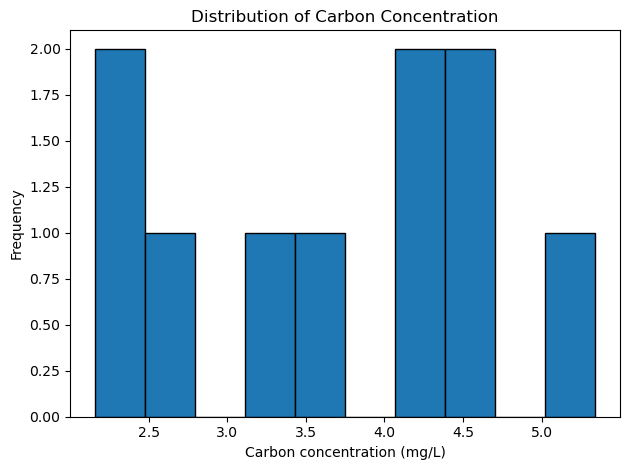

In [190]:
# Histogram 
water_C = water["C_total_mg_L"]

plt.hist(water_C, bins=10, edgecolor="black")
plt.xlabel("Carbon concentration (mg/L)")
plt.ylabel("Frequency")
plt.title("Distribution of Carbon Concentration")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

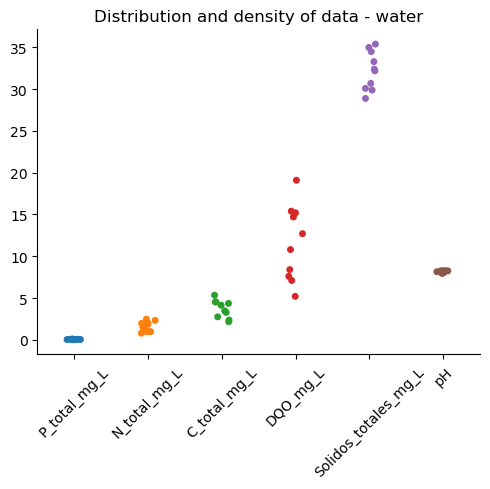

In [191]:
#Violin plot 
plt.figure(figsize=(12,6))
sns.catplot(data=water.drop(columns=["Sitio","Distancia_m","Muestra"]))
plt.title("Distribution and density of data - water")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [192]:
#Boxplot para ver rango y valores atípicos: Observación rápida de la variabilidad y posibles valores extremos
plt.figure(figsize=(12,6))
sns.boxplot(data=water.drop(columns=["Sitio","Distancia_m","Muestra","Solidos_totales_mgL"])) #.drop() en pandas se usa paraeliminar columnas o filas de un DataFrame (no contienen datos numéricos útiles para el boxplot)
plt.title("Distribution of physicochemical variables - Water")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: "['Solidos_totales_mgL'] not found in axis"

<Figure size 1200x600 with 0 Axes>

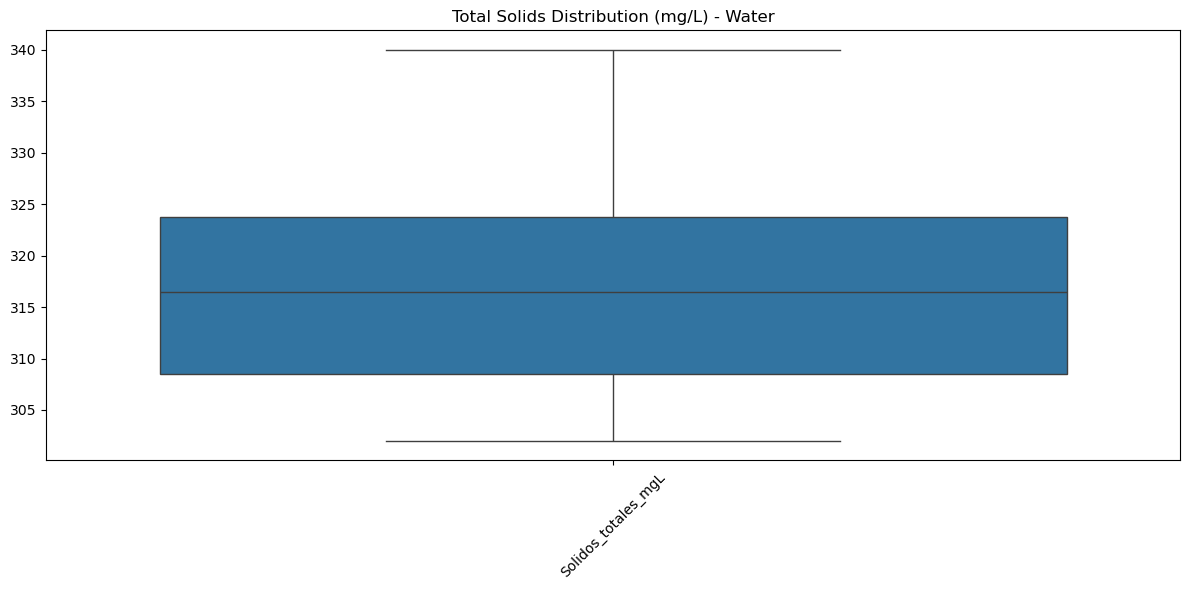

In [ ]:

plt.figure(figsize=(12,6))
sns.boxplot(data=water[["Solidos_totales_mgL"]]) 
plt.title("Total Solids Distribution (mg/L) - Water")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Sediment data

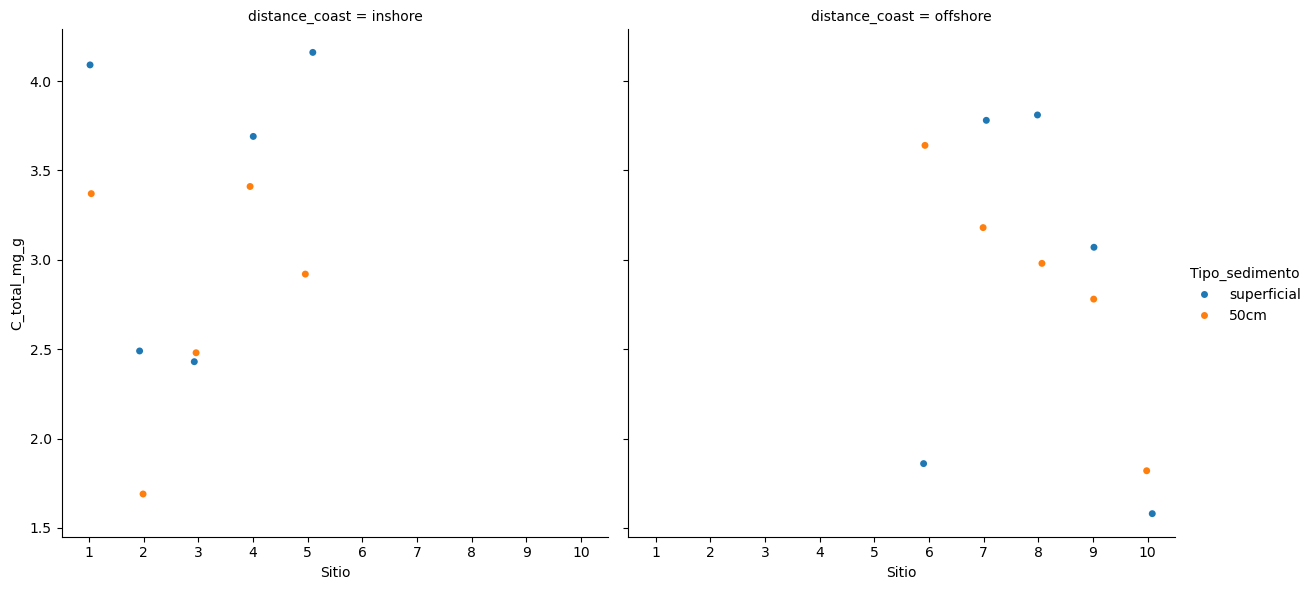

In [194]:
# Create a new column named "distance_coast" to define sites considering as: inshore and offshore
# if Sitios 1-5 are inshore, 6-10 offshore
sediment["distance_coast"] = sediment["Sitio"].apply(lambda x: "inshore" if x <= 5 else "offshore")


sns.catplot(
    data=sediment,
    x="Sitio", y="C_total_mg_g",
    hue="Tipo_sedimento",
    col="distance_coast", 
    kind="strip",
    height=6, aspect=1
)

plt.show()

En general, la variación del C es alta y no parece haber un patrón que muestre una relación significativa. 

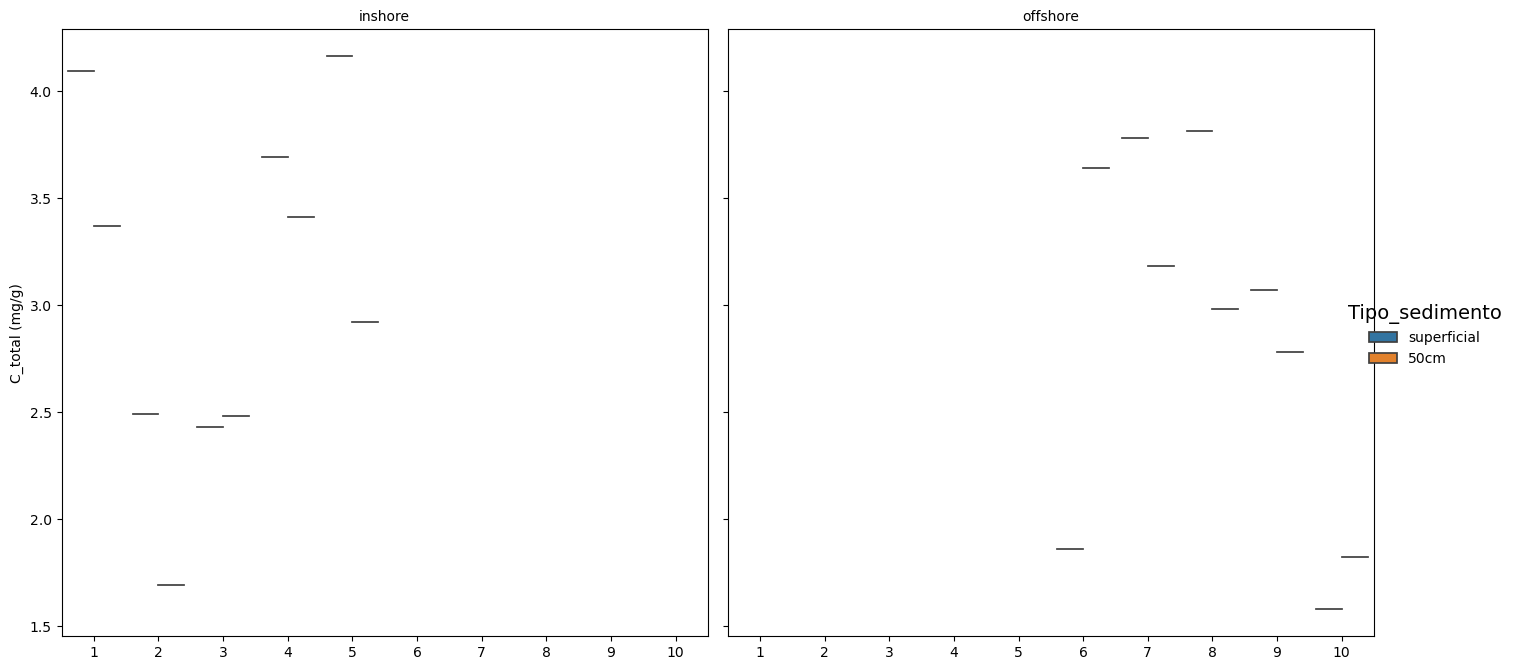

In [195]:
#plot a violin plot with Catplot in Seaborn

# Creamos una variable categórica "distance_coast"
ax = sns.catplot(
    data=sediment,
    x="Sitio", y="C_total_mg_g",
    hue="Tipo_sedimento", col="distance_coast",
    kind="violin",
    height=7, aspect=1
)

# Personalización
ax.set(xlabel='', ylabel='C_total (mg/g)')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.setp(ax._legend.get_title(), fontsize=14)
sns.despine(top=False, right=False)

plt.show()

With my current data (one value per combination), Seaborn only draws lines.

Violin plots aren't the best fit for my data, as they require multiple observations per group to estimate density. Therefore, the plot only shows a line instead of a violin shape.

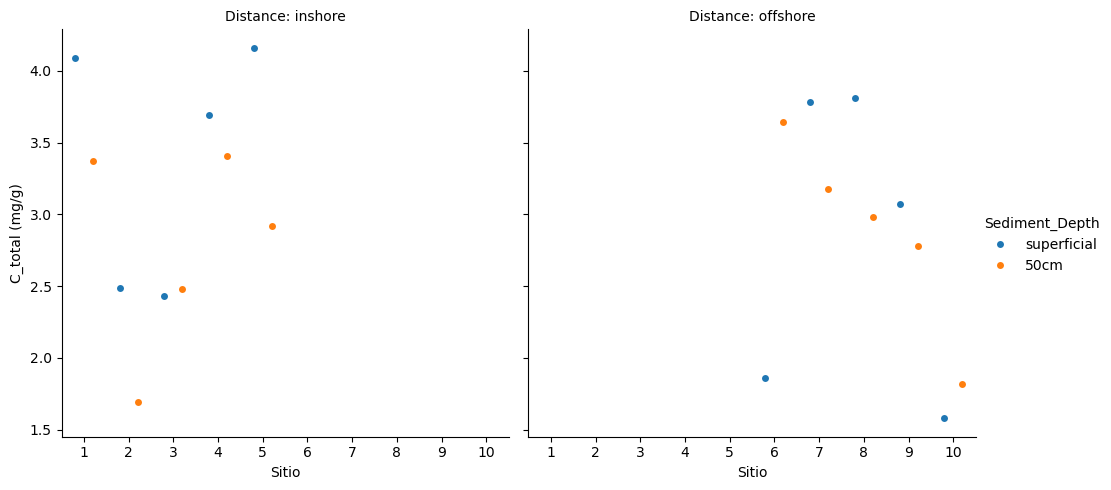

In [221]:
#Define color palette
palette = {"superficial": "#1f77b4", "50cm": "#ff7f0e"}  

# Stripplot with facets (col="distance_coast") and colors by sediment type
ax = sns.catplot(
    data=sediment,
    x="Sitio", y="C_total_mg_g",
    hue="Tipo_sedimento", col="distance_coast",
    kind="strip",
    dodge=True,       # separates points from the same place
    jitter=True,      # slightly disperse the points to avoid overlapping
    height=5, aspect=1,
    palette=palette
)

#Improve legend and titles
ax.set_axis_labels("Sitio", "C_total (mg/g)")
ax.set_titles(col_template="Distance: {col_name}")
ax._legend.set_title("Sediment_Depth")




*Eje X (Sitio)*: sitios de estudio

*Eje Y (C_total mg/g)*: valores de carbono total

*Hue (Tipo_sedimento)*: colores para superficial y 50 cm.

*Facetas (col="zona")*: definir dos paneles: inshore y offshore.

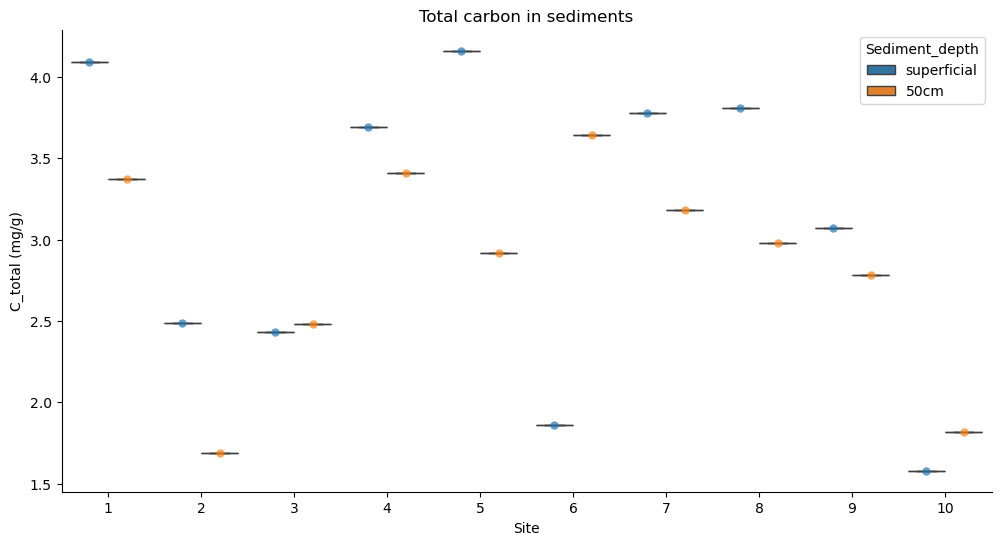

In [222]:
#Boxplot + stripplot
plt.figure(figsize=(12,6))

# Boxplot para ver la tendencia y dispersión
sns.boxplot(
    data=sediment,
    x="Sitio", y="C_total_mg_g",
    hue="Tipo_sedimento",
    showcaps=True, 
    boxprops={'facecolor':'None'}, # cajas transparentes
    showfliers=False,
    whiskerprops={'linewidth':0},
)

# Stripplot para ver los puntos reales
sns.stripplot(
    data=sediment,
    x="Sitio", y="C_total_mg_g",
    hue="Tipo_sedimento",
    dodge=True, 
    alpha=0.7, size=6
)

plt.ylabel("C_total (mg/g)")
plt.xlabel("Site")
plt.title("Total carbon in sediments")

# Ajustar leyenda (se repite por box+strip)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title="Sediment_depth")

sns.despine()
plt.show()

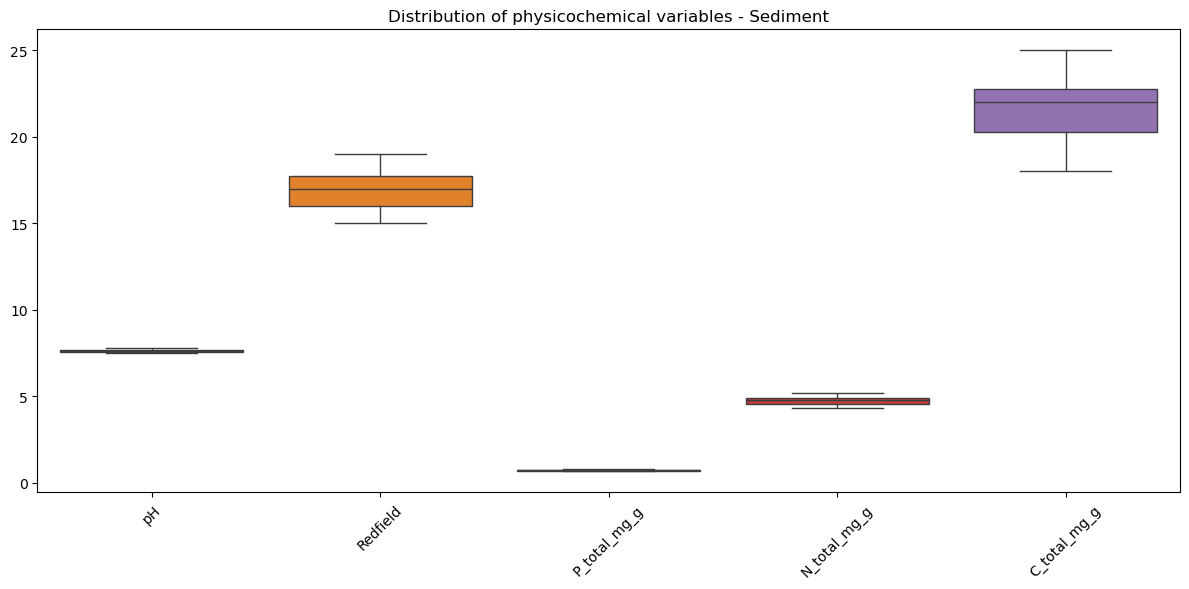

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=sediment.drop(columns=["Sitio","Distancia_m","Tipo_sedimento","Conductividad_uS","Humedad_%"]))
plt.title("Distribution of physicochemical variables - Sediment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

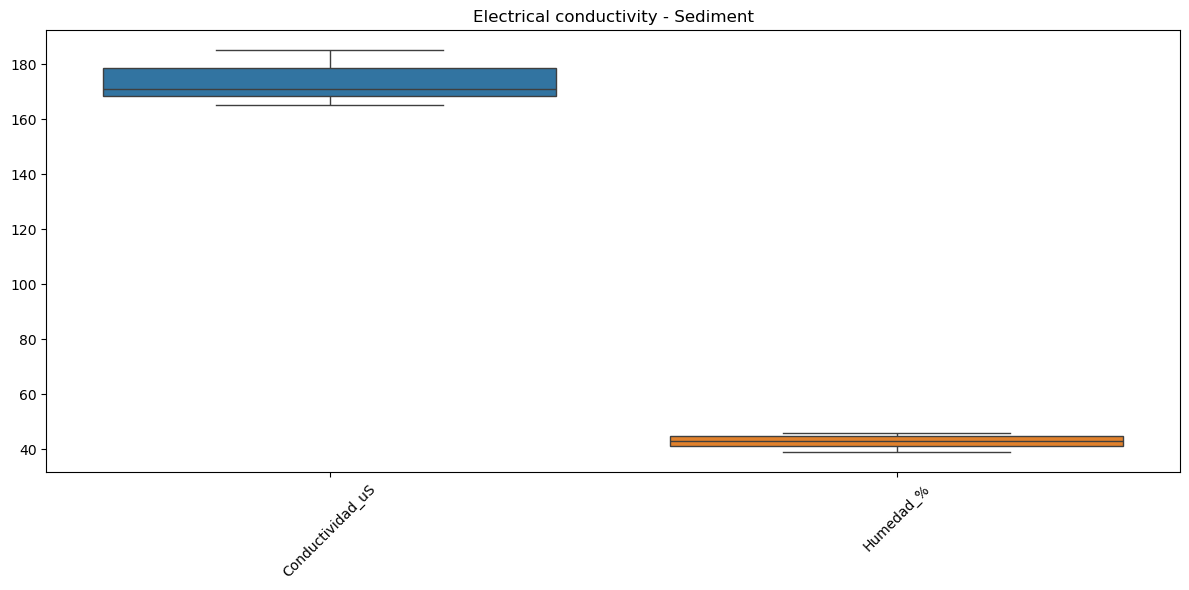

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=sediment[["Conductividad_uS", "Humedad_%"]])
plt.title("Electrical conductivity - Sediment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

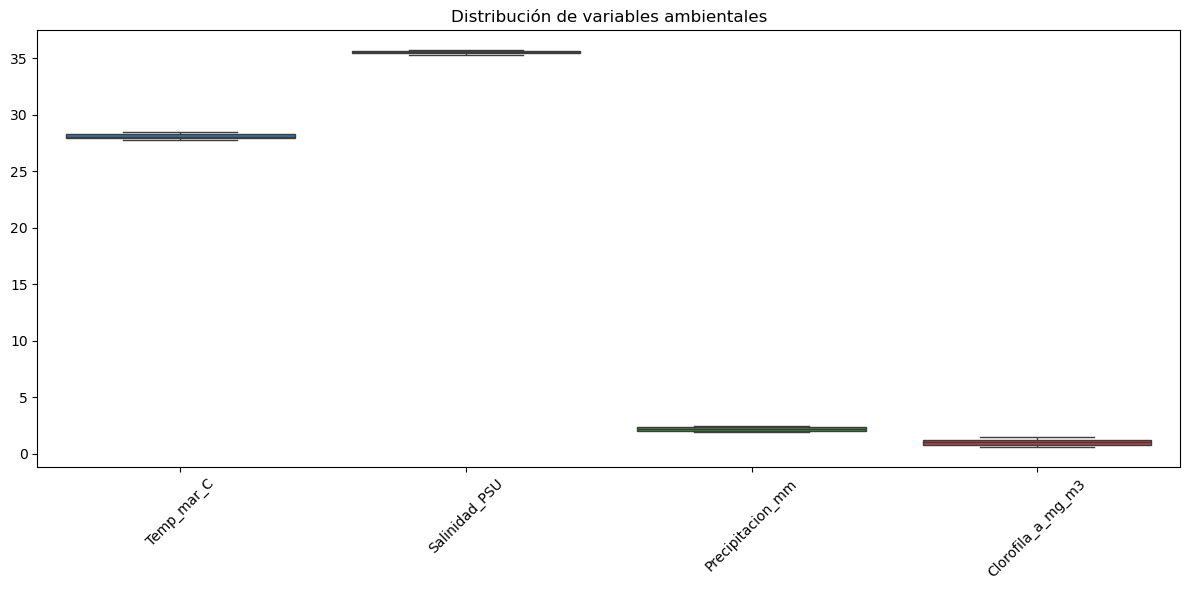

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=environment.drop(columns=["Fecha","Sitio","Distancia_m", "PAR_mmol_m2_s"]))
plt.title("Distribution of environmental variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

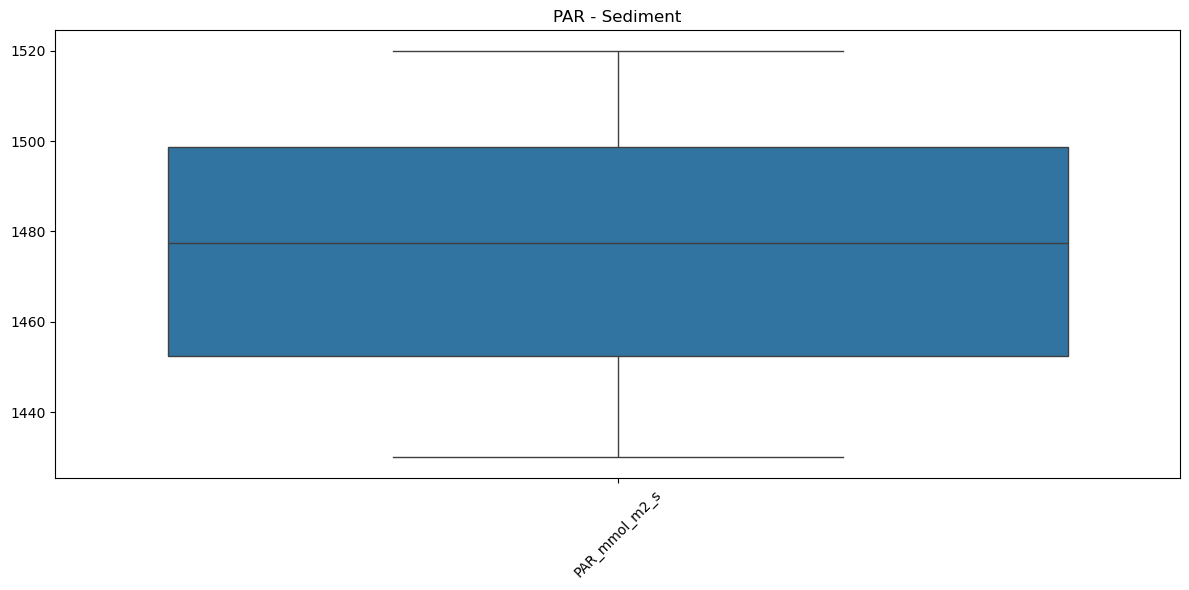

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=environment[["PAR_mmol_m2_s"]])
plt.title("PAR - Sediment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Association between physicochemical and environmental variables 

In [ ]:
sediment

,Sitio,Tipo_sedimento,Distancia_m,Humedad_%,pH,CE_uS,Redfield_ratio,C_total_mg_g,N_total_mg_g,P_total_mg_g
0,1,superficial,0,35.0,7.99,683.1,15.1,4.09,0.58,0.041
1,1,50cm,0,58.0,7.61,1242.8,14.2,3.37,0.38,0.026
2,2,superficial,10,49.3,7.73,551.6,18.6,2.49,0.31,0.027
3,2,50cm,10,43.9,7.79,1864.0,14.9,1.69,0.20,0.019
4,3,superficial,20,26.2,7.86,888.2,14.2,2.43,0.25,0.022
5,3,50cm,20,26.2,8.13,1493.8,16.3,2.48,0.32,0.026
6,4,superficial,30,22.3,7.66,967.6,13.1,3.69,0.45,0.032
7,4,50cm,30,54.6,7.91,1280.1,18.4,3.41,0.37,0.026
8,5,superficial,40,44.0,7.97,1320.1,12.6,4.16,0.54,0.054
9,5,50cm,40,48.3,7.54,777.3,19.9,2.92,0.40,0.032


In [ ]:
sediment.columns

Index(['Sitio', 'Tipo_sedimento', 'Humedad_%', 'pH', 'CE_uS', 'Redfield_ratio',
       'C_total_mg_g', 'N_total_mg_g', 'P_total_mg_g', 'distance_coast'],
      dtype='object')

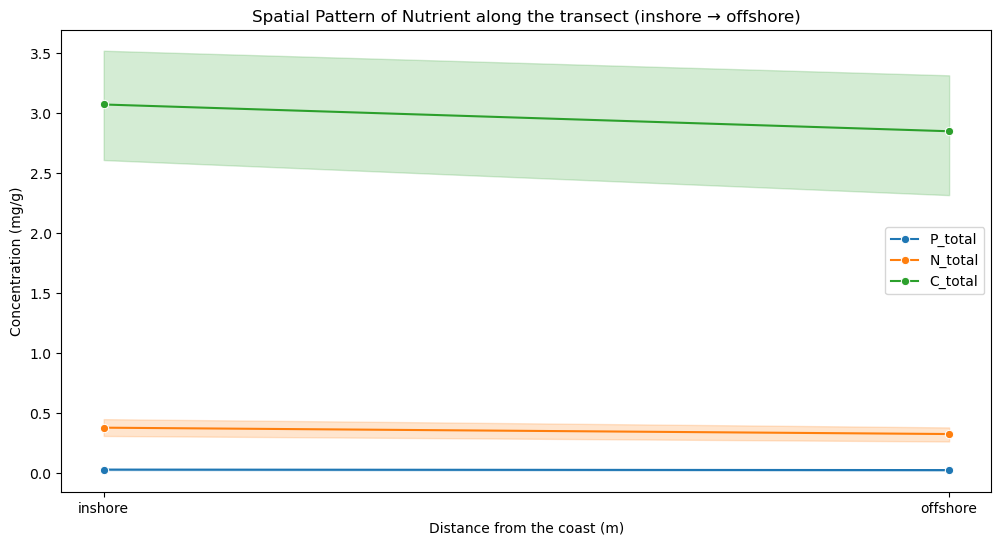

In [228]:
### Sediment
plt.figure(figsize=(12,6))
sns.lineplot(data=sediment, x="distance_coast", y="P_total_mg_g", marker="o", label="P_total")
sns.lineplot(data=sediment, x="distance_coast", y="N_total_mg_g", marker="o", label="N_total")
sns.lineplot(data=sediment, x="distance_coast", y="C_total_mg_g", marker="o", label="C_total")
plt.title("Spatial Pattern of Nutrient along the transect (inshore → offshore)")
plt.xlabel("Distance from the coast (m)")
plt.ylabel("Concentration (mg/g)")
plt.legend()
plt.show()

The "Spatial Pattern of Nutrient along the transect (inshore → offshore)" graph shows a spatial pattern, with decreasing nutrients as distance from the coast increases.

In [202]:
sediment.columns

Index(['Sitio', 'Tipo_sedimento', 'Distancia_m', 'Humedad_%', 'pH', 'CE_uS',
       'Redfield_ratio', 'C_total_mg_g', 'N_total_mg_g', 'P_total_mg_g',
       'distance_coast'],
      dtype='object')

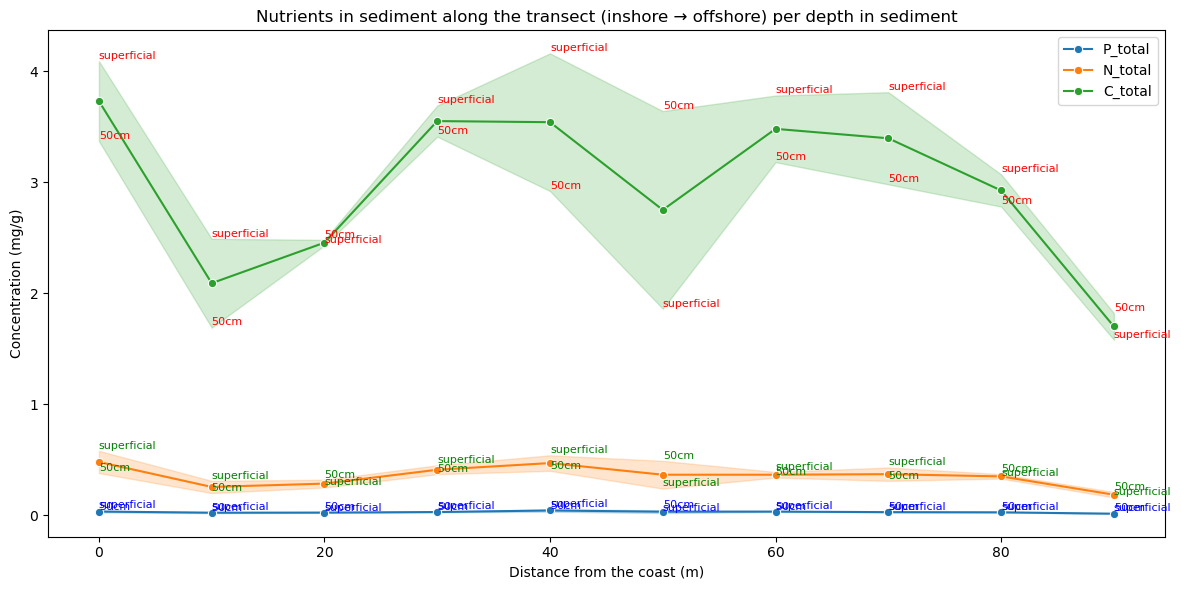

In [ ]:
### Sediment
plt.figure(figsize=(12, 6))

# Plot each line
sns.lineplot(data=sediment, x="Distancia_m", y="P_total_mg_g", marker="o", label="P_total")
sns.lineplot(data=sediment, x="Distancia_m", y="N_total_mg_g", marker="o", label="N_total")
sns.lineplot(data=sediment, x="Distancia_m", y="C_total_mg_g", marker="o", label="C_total")

# Label each point with the sediment type
for i in range(len(sediment)):
    tipo = sediment["Tipo_sedimento"].iloc[i]  # Column with labels of depth in sediment
    x = sediment["Distancia_m"].iloc[i]
    y_P = sediment["P_total_mg_g"].iloc[i]
    y_N = sediment["N_total_mg_g"].iloc[i]
    y_C = sediment["C_total_mg_g"].iloc[i]

    plt.text(x, y_P + 0.02, tipo, fontsize=8, color="blue")
    plt.text(x, y_N + 0.02, tipo, fontsize=8, color="green")
    plt.text(x, y_C + 0.02, tipo, fontsize=8, color="red")

plt.title("Nutrients in sediment along the transect (inshore → offshore) per depth in sediment")
plt.xlabel("Distance from the coast (m)")
plt.ylabel("Concentration (mg/g)")
plt.legend()
plt.tight_layout()
plt.show()



The "Spatial Pattern of Nutrient along the transect (inshore → offshore) per depth in sediment" graph shows a different spatial pattern; the trend of decreasing nutrients with increasing distance from the coast is not as clear.

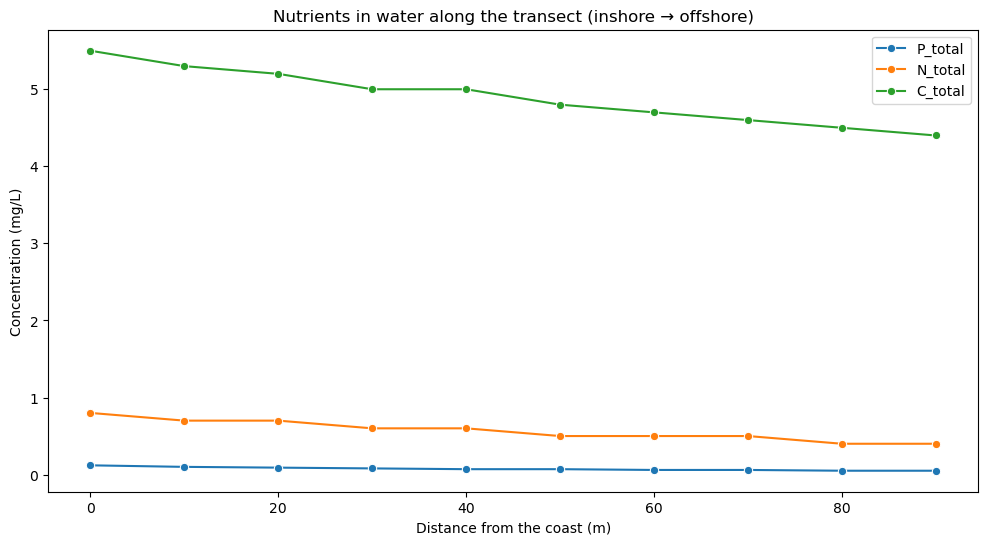

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=water, x="Distancia_m", y="P_total_mgL", marker="o", label="P_total")
sns.lineplot(data=water, x="Distancia_m", y="N_total_mgL", marker="o", label="N_total")
sns.lineplot(data=water, x="Distancia_m", y="C_total_mgL", marker="o", label="C_total")
plt.title("Nutrients in water along the transect (inshore → offshore)")
plt.xlabel("Distance from the coast (m)")
plt.ylabel("Concentration (mg/L)")
plt.legend()
plt.show()

The graph "Nutrients in water along the transect (inshore → offshore)" shows that nutrients such as carbon, nitrogen, and phosphorus decrease with increasing distance from the coast.

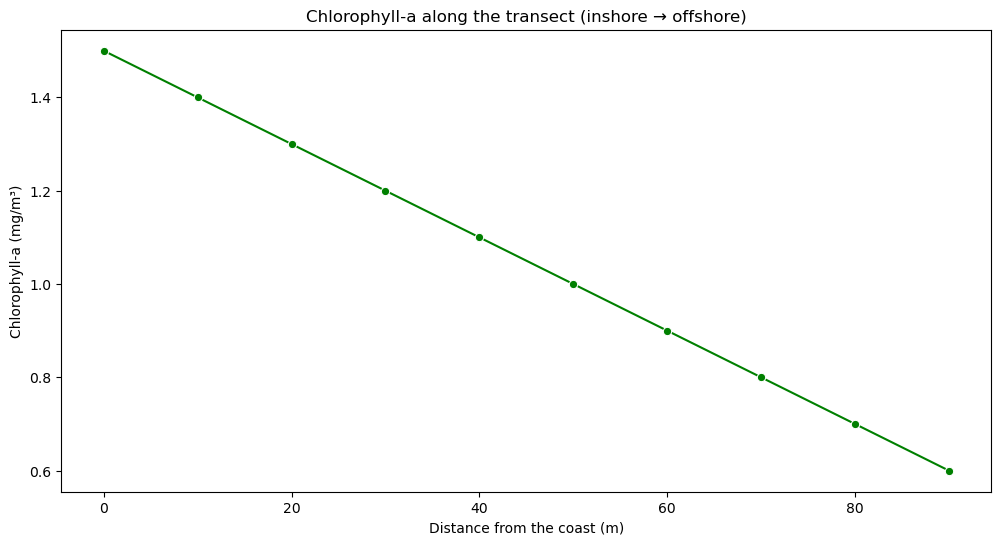

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=environment, x="Distancia_m", y="Clorofila_a_mg_m3", marker="o", color="green")
plt.title("Chlorophyll-a along the transect (inshore → offshore)")
plt.xlabel("Distance from the coast (m)")
plt.ylabel("Chlorophyll-a (mg/m³)")
plt.show()

The graph "Chlorophyll-a along the transect (inshore → offshore)" shows that Chlorophyll-a, similar to nutrients, decrease with increasing distance from the coast.

#### Correlation 

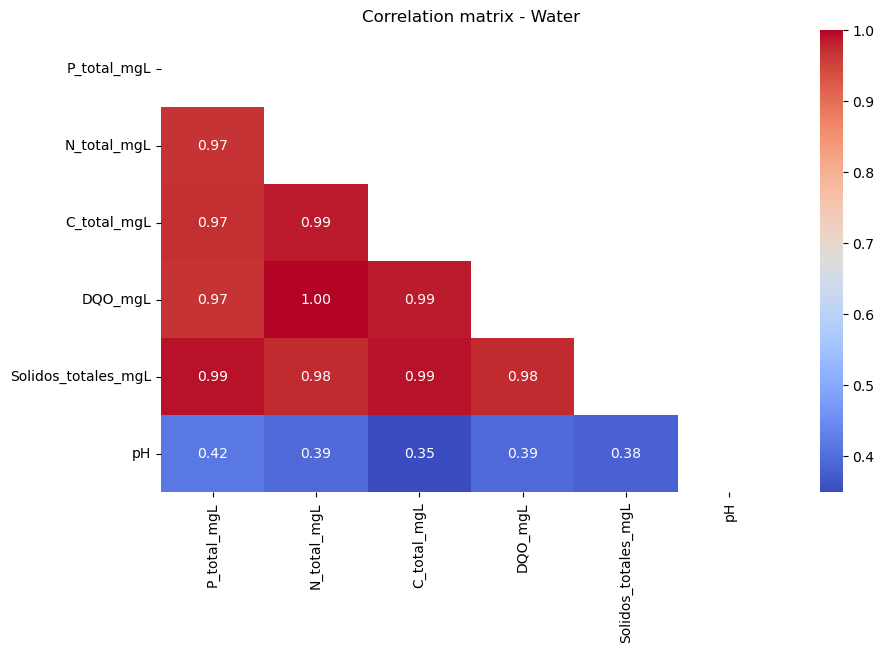

In [ ]:
#Estimation of the correlation matrix
corr_water = water.drop(columns=["Sitio","Distancia_m","Muestra"]).corr()

#Create a mask for the top half of the heat map
mask = np.triu(np.ones_like(corr_water, dtype=bool))

#Heatmap visualization
plt.figure(figsize=(10,6))
sns.heatmap(corr_water, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix - Water")
plt.show()

This heatmap "Correlation matrix - Water" shows that these physicochemical variables are highly related with each other, with the exception of pH.

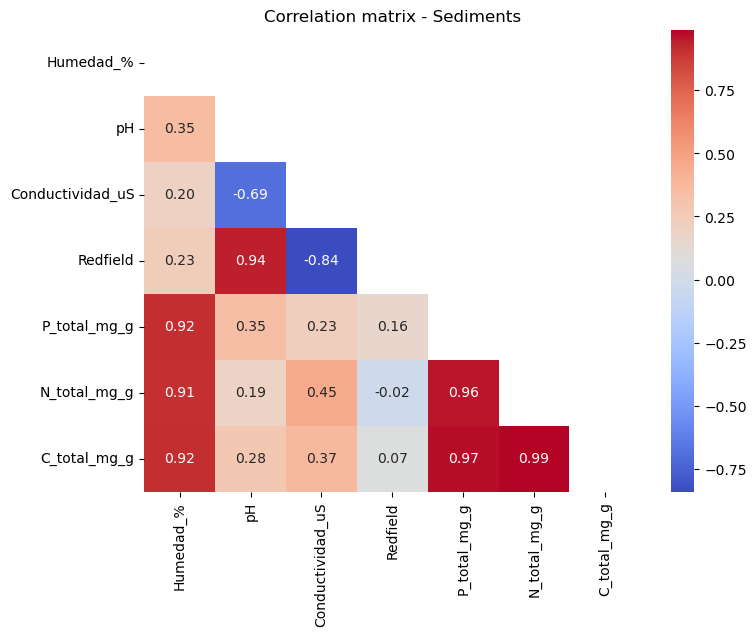

In [ ]:
corr_sed = sediment.drop(columns=["Sitio","Distancia_m","Tipo_sedimento"]).corr()

mask = np.triu(np.ones_like(corr_sed, dtype=bool))

plt.figure(figsize=(8,6))
sns.heatmap(corr_sed, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix - Sediments")
plt.show()

The heatmap "Correlation matrix - Sediments" shows that it has a strong positive correlation between N-C-P and %humidity. However, also is detected a negative corrrelation between Redfield-Conductividad and pH. 

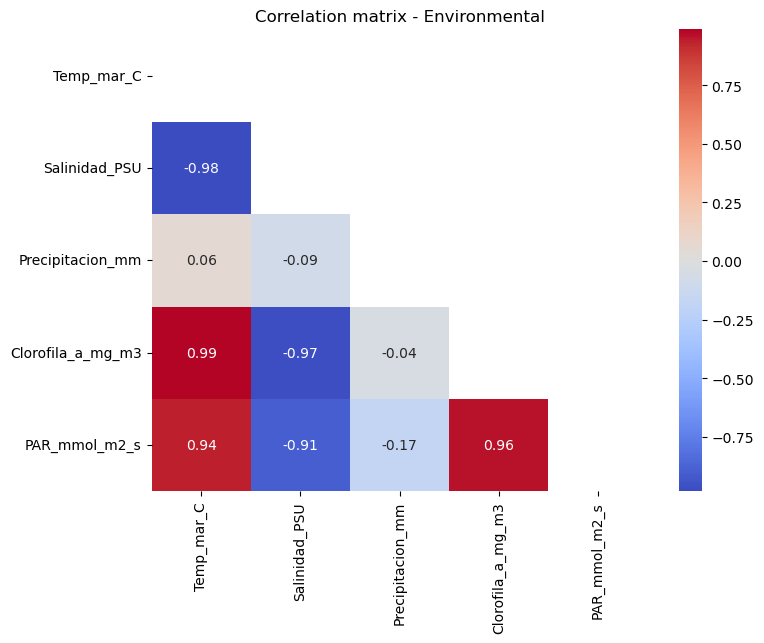

In [ ]:
corr_env = environment.drop(columns=["Fecha","Sitio","Distancia_m"]).corr()

mask = np.triu(np.ones_like(corr_env, dtype=bool))

plt.figure(figsize=(8,6))
sns.heatmap(corr_env, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix - Environmental")
plt.show()

The "Correlation Matrix - Environment" heatmap shows a strong positive correlation between chlorophyll-a and PAR. However, a negative correlation is also detected between salinity and temperature and chlorophyll-a.

#### Multivariate analysis


<Figure size 1500x1000 with 0 Axes>

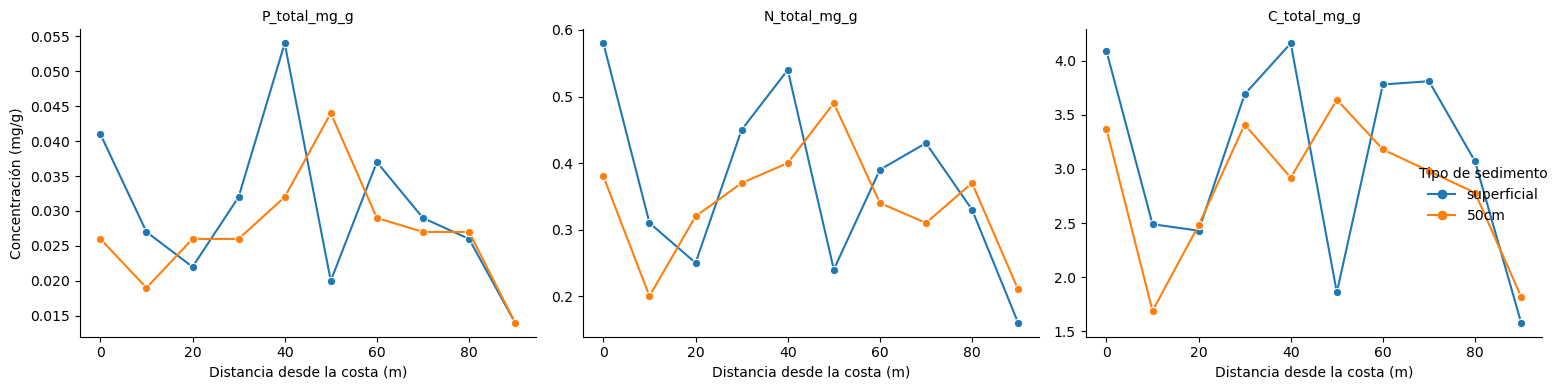

In [ ]:
#Visualize trends by depth in the sediment, along the transect, and for various nutrients
plt.figure(figsize=(15, 10))

# Rearrange to have 'Nutrient' and 'Concentration' columns
sediment_long = sediment.melt(
    id_vars=["Distancia_m", "Tipo_sedimento", "Sitio"],
    value_vars=["P_total_mg_g", "N_total_mg_g", "C_total_mg_g"],
    var_name="Nutriente",
    value_name="Concentración"
)


# Line chart by nutrient, separated by sediment type
g = sns.relplot(
    data=sediment_long,
    x="Distancia_m", y="Concentración",
    hue="Tipo_sedimento", col="Nutriente",
    kind="line", marker="o", facet_kws={"sharey": False},
    height=4, aspect=1.2
)

g.set_titles("{col_name}")
g.set_axis_labels("Distancia desde la costa (m)", "Concentración (mg/g)")
g._legend.set_title("Tipo de sedimento")
plt.tight_layout()
plt.show()


In [ ]:
# Regresión lineal por nutriente
## Esto te dice si la distancia y/o la profundidad tienen efectos significativos sobre la concentración.

import statsmodels.formula.api as smf

# Ejemplo para P_total
modelo = smf.ols("P_total_mg_g ~ Distancia_m + Tipo_sedimento", data=sediment).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:           P_total_mg_g   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.7928
Date:              dom., 07 sep. 2025   Prob (F-statistic):              0.469
Time:                        23:54:37   Log-Likelihood:                 65.665
No. Observations:                  20   AIC:                            -125.3
Df Residuals:                      17   BIC:                            -122.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [237]:
#ANOVA DE 2 VÍAS
## Para evaluar si hay diferencias significativas por nutriente y profundidad
## Esto te muestra si hay interacciones significativas entre tipo de sedimento y nutriente.
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Reorganiza el DataFrame s
sediment_long = sediment.melt(
    id_vars=["Distancia_m", "Tipo_sedimento"],
    value_vars=["P_total_mg_g", "N_total_mg_g", "C_total_mg_g"],
    var_name="Nutriente", value_name="Concentración"
)

# ANOVA de dos vías
modelo_anova = ols("Concentración ~ C(Tipo_sedimento) + C(Nutriente) + C(Tipo_sedimento):C(Nutriente)", data=sediment_long).fit()
anova_table = sm.stats.anova_lm(modelo_anova, typ=2)
print(anova_table)


                                    sum_sq    df           F        PR(>F)
C(Tipo_sedimento)                 0.151202   1.0    0.669100  4.169604e-01
C(Nutriente)                    103.394176   2.0  228.769742  4.314139e-27
C(Tipo_sedimento):C(Nutriente)    0.214859   2.0    0.475396  6.242156e-01
Residual                         12.202850  54.0         NaN           NaN


#### PCA

In [ ]:
# PCA (Análisis de Componentes Principales)
# Para ver si hay agrupamientos por profundidad o sitio:

# Selecciona las columnas de nutrientes
X = sediment[["P_total_mg_g", "N_total_mg_g", "C_total_mg_g"]]

# Escala los datos
X_scaled = StandardScaler().fit_transform(X)

# Aplica PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Crea un DataFrame con los componentes
pca_df = pd.DataFrame(components, columns=["PC1", "PC2"])
pca_df["Tipo_sedimento"] = sediment["Tipo_sedimento"].values


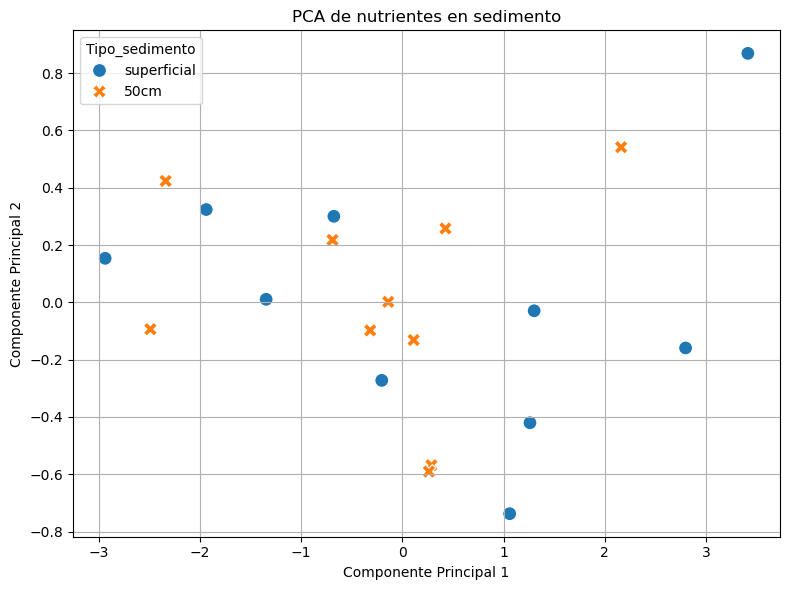

In [247]:
# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Tipo_sedimento", style="Tipo_sedimento", s=100)
plt.title("PCA de nutrientes en sedimento")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()

Since the PCA shows that the surface and 50cm samples are mixed together, we can infer that the chemical profiles are similar between depths.

In [250]:
#Mostrar varianza explicada
print("Varianza explicada por cada componente:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

Varianza explicada por cada componente:
PC1: 93.02%
PC2: 5.15%


Conviene quedarte con el primer componente porque explica prácticamente toda la varianza
Esto implica 

- Reducción efectiva: puedes representar tus datos en 1D (solo PC1) sin perder casi nada de información.

- Alta colinealidad: tus variables están fuertemente correlacionadas entre sí.

- Visualización simplificada: puedes usar PC1 como un eje de ordenamiento o agrupamiento.

In [ ]:
print(pca.explained_variance_ratio_)

[0.93023379 0.05148177]


- La varianza explicada en PCA es clave para entender cuánto de la información original estás conservando al reducir dimensiones. Aquí va una explicación clara y práctica
- Cuando haces PCA, estás transformando tus variables originales en componentes principales (PCs), que son combinaciones lineales de las variables originales. Cada componente captura una parte de la variabilidad total de los datos.

    PC1 captura la mayor cantidad de varianza posible.
    
    PC2 captura la mayor varianza restante, y así sucesivamente.

    La varianza explicada te dice cuánta información (variabilidad) conserva cada componente.

- Para visualización: 80–90% acumulada suele ser suficiente.

Para análisis más exigentes (clustering, clasificación): idealmente >90%.

Si los primeros PCs explican poca varianza, puede que tus datos no tengan patrones claros o estén muy dispersos.

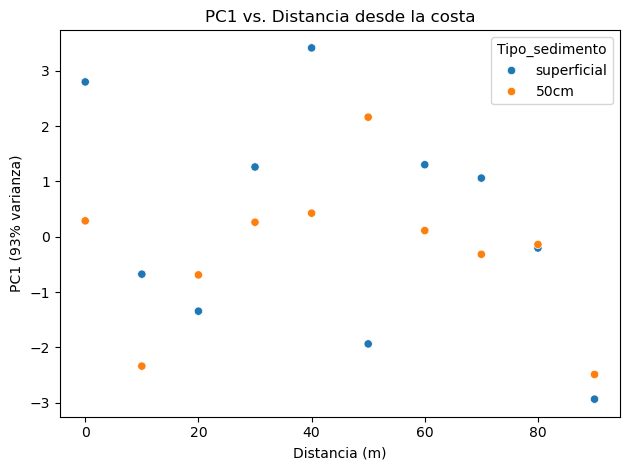

In [ ]:
#Graficar PC1 vs. distancia
pca_df["Distancia_m"] = sediment["Distancia_m"]
sns.scatterplot(data=pca_df, x="Distancia_m", y="PC1", hue="Tipo_sedimento")
plt.title("PC1 vs. Distancia desde la costa")
plt.xlabel("Distancia (m)")
plt.ylabel("PC1 (93% varianza)")
plt.tight_layout()
plt.show()

Tendencia general: parece que los valores de PC1 disminuyen conforme aumenta la distancia desde la costa, especialmente en los sedimentos a 50 cm. Eso sugiere un gradiente ambiental: más nutrientes o variabilidad cerca de la costa, menos conforme te alejas.

Separación por profundidad:

Los puntos superficiales (azul) están más dispersos y tienden a valores positivos de PC1.

Los de 50 cm (naranja) se agrupan más y tienden a valores negativos.

Esto refuerza lo que ves en el boxplot: más variabilidad en superficie, y condiciones más homogéneas en profundidad.

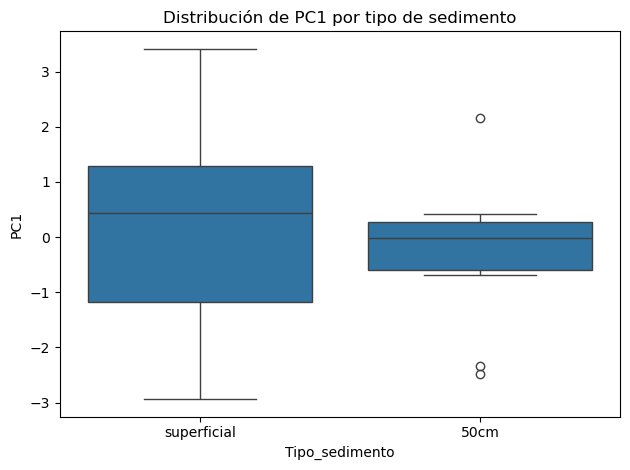

In [ ]:
#Puedes usar PC1 como una nueva variable para comparar sitios
sns.boxplot(data=pca_df, x="Tipo_sedimento", y="PC1")
plt.title("Distribución de PC1 por tipo de sedimento")
plt.tight_layout()
plt.show()


Superficial:

- Mayor dispersión en los valores de PC1.

- Mediana ligeramente positiva → más nutrientes o variabilidad en superficie.

- Posibles subgrupos u outliers que podrían reflejar diferencias entre sitios.

50cm:

- Distribución más compacta.

- Mediana negativa → tendencia a menor concentración o diferente perfil químico.
 
- Menos variabilidad → condiciones más homogéneas en profundidad.

In [254]:
#Para saber qué variables contribuyen más a PC1:
# loadings = pd.Series(pca.components_[0], index=["P_total_mg_g", "N_total_mg_g", "C_total_mg_g"])
print("Cargas de PC1:")
print(loadings.sort_values(ascending=False))


Cargas de PC1:
N_total_mg_g    0.587366
C_total_mg_g    0.575013
P_total_mg_g    0.569528
dtype: float64


*loadings* indica que PC1 podría interpretarse como un gradiente de enriquecimiento nutricional, donde valores altos de PC1 reflejan muestras con más P, C y N.

1° Nitrógeno (N) tiene la mayor influencia en PC1.

2° Carbono (C) también contribuye bastante.

3° Fósforo (P) tiene una influencia moderada.